In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.table import Table

In [2]:
lf = Table.read('lumfunc.csv', format='ascii')
m, phi = lf['col1'].data, lf['col2'].data
m, phi

(array([-22.96, -22.84, -22.73, -22.64, -22.54, -22.43, -22.34, -22.24,
        -22.14, -22.04, -21.94, -21.85, -21.75, -21.64, -21.53]),
 array([  1.25000000e-05,   1.63000000e-05,   2.35000000e-05,
          3.31000000e-05,   4.31000000e-05,   6.61000000e-05,
          8.25000000e-05,   1.10000000e-04,   1.49000000e-04,
          1.93000000e-04,   2.32000000e-04,   2.84000000e-04,
          3.62000000e-04,   4.17000000e-04,   5.11000000e-04]))

(1e-06, 0.001)

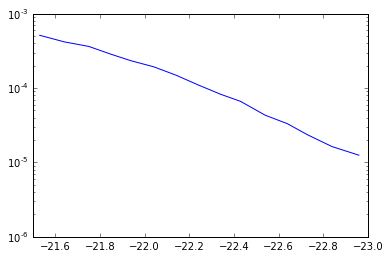

In [3]:
plt.semilogy(m, phi)
plt.xlim(-21.5, -23)
plt.ylim(1e-6, 1e-3)

In [4]:
def lumfunc(x, phis, alphas, M):
    return 0.4*np.log(10.)*phis*((10.**(0.4*(M-x)))**(alphas+1.))*(np.exp(-10.**(0.4*(M-x))))

In [5]:
p0 = [1.2e-2, -1.5, -20.5]
lfcoef, lfcov = curve_fit(lumfunc, m, phi, p0=p0)
print lfcoef

[  2.39179983e-03  -1.39253659e+00  -2.12074683e+01]


(1e-06, 0.001)

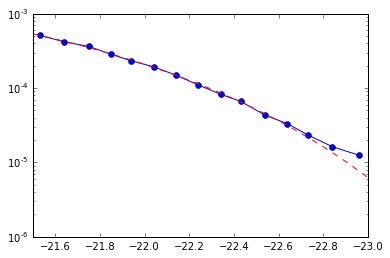

In [6]:
plt.semilogy(lf['col1'],lf['col2'], 'bo-')
mabs = np.linspace(-21.5, -23, 100)
#plt.semilogy(mabs, lumfunc(mabs, 1.2e-2, -1.5, -20.5))
plt.semilogy(mabs, lumfunc(mabs, lfcoef[0], lfcoef[1], lfcoef[2]), 'r--')
plt.xlim(-21.5, -23)
plt.ylim(1e-6, 1e-3)

In [3]:
y = [2252,2298,2320,2422,3344,9727,6173,2679,2363,2256,2268,2297]
x = [1,2,3,4,5,6,7,8,9,10,11,12]

y = np.array(y)
x = np.array(x)

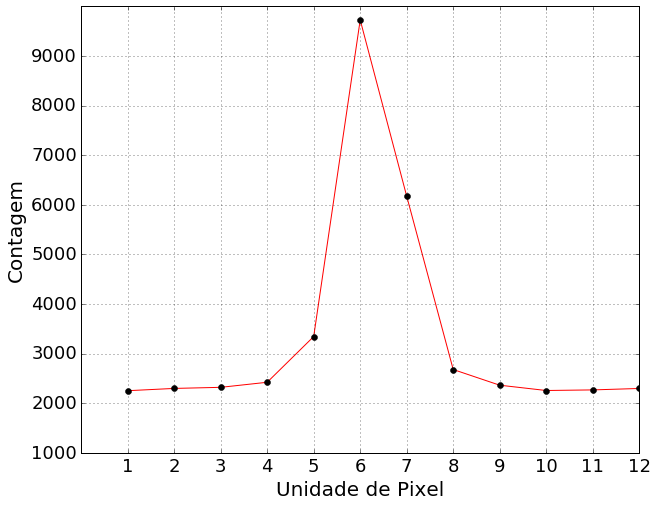

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

plt.plot(x,y, 'r-')
plt.plot(x,y, 'ko')
ax.set_xticks(x)
ax.set_yticks(range(1000,10000,1000))
plt.grid()
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Unidade de Pixel',fontsize = 20)
plt.ylabel('Contagem',fontsize = 20)

#plt.savefig('seeing.png', format='png', dpi=100)
plt.show()

In [6]:
mean = np.mean(y)
sigma = np.std(y)

In [37]:
print mean, sigma

3366.58333333 2194.07089138


In [38]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [39]:
popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

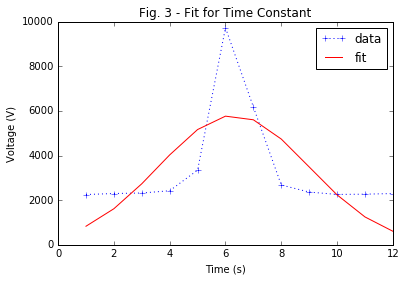

In [41]:
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])

plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()